In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
img = cv2.imread("ticket_ratp_octobre_2018.jpg")
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 75, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
imContours = cv2.drawContours(img, contours, -1, (255,0,0), 1)

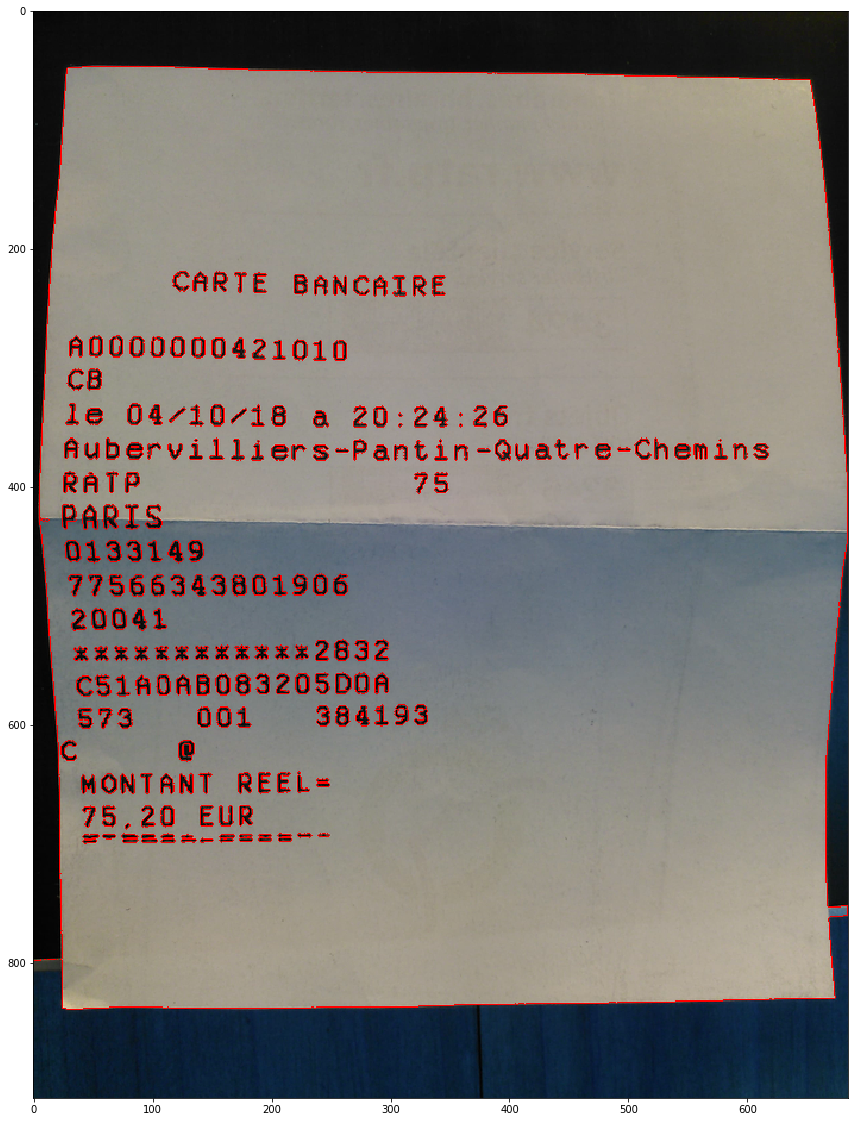

In [23]:
plt.figure(figsize=(20,20))
plt.imshow(imContours, cmap='gray')
plt.show()

In [40]:
np.min(contours[12], axis=0)

array([[23, 56]], dtype=int32)

In [41]:
np.max(contours[12], axis=0)

array([[29, 63]], dtype=int32)

height 17 width 11
min [2 2]
max [13 19]


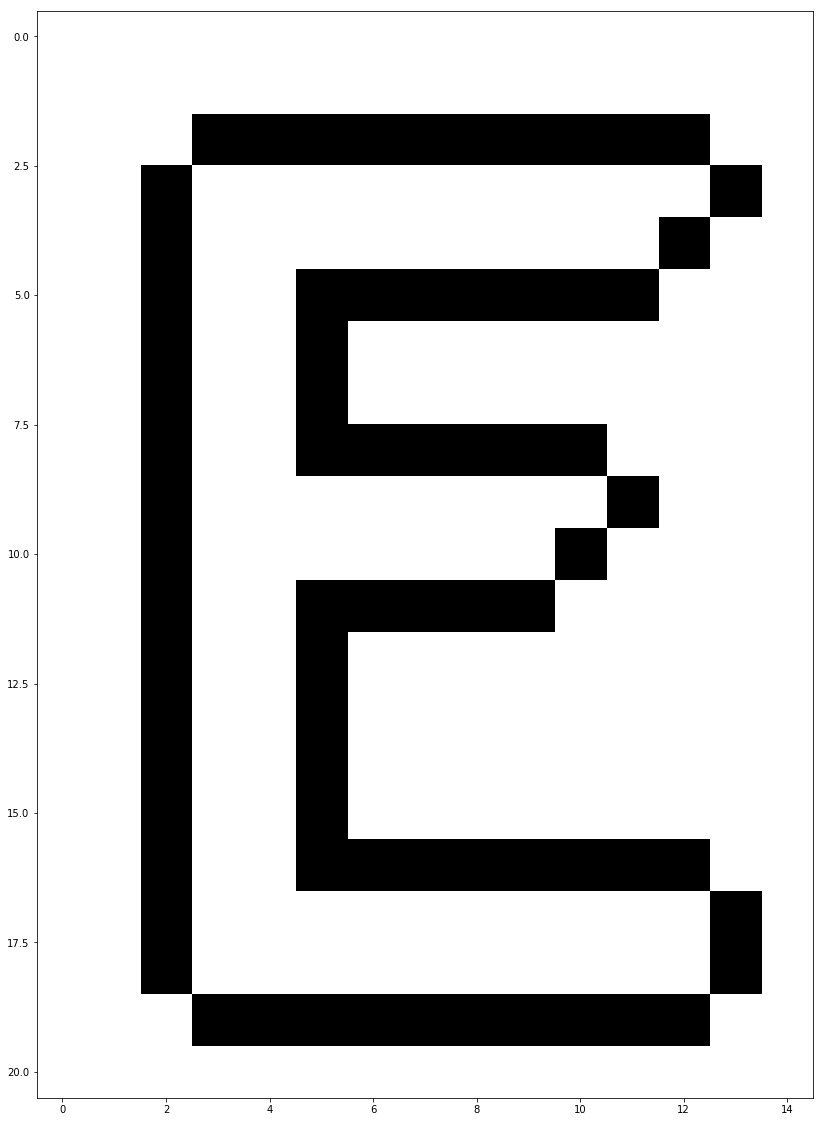

In [75]:
id_contour = 31
# print(contours[id_contour])
sample = contours[id_contour]
sample = np.array([[point[0][0], point[0][1]] for point in contours[id_contour]], np.int32)
# print(sample)
min_ = np.min(sample, axis=0)
# print('min', min_)
max_ = np.max(sample, axis=0)
# print('max', max_)
height = max_[1] - min_[1]
width = max_[0] - min_[0]
print('height', height, 'width', width)
sample = np.array([[point[0] - min_[0] + 2 , point[1] - min_[1] + 2] for point in sample])
# print(sample)
min_ = np.min(sample, axis=0)
print('min', min_)
max_ = np.max(sample, axis=0)
print('max', max_)
img = np.full((height + 4, width + 4, 3), 255)
# patch = img[min_[0][0]:max_[0][0], min_[0][1]:max_[0][1]]

img = cv2.polylines(img, np.int32([sample]), True, (0,0,0),1)
            
plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')
plt.show()